<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%8620%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

事前環境構築

In [ ]:
!apt install aptitude

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [ ]:
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
The following NEW packages will be installed:
  file libmagic-mgc{a} libmagic1{a} libmecab-dev libmecab2{a} mecab mecab-ipadic{a} mecab-ipadic-utf8 mecab-jumandic{a} mecab-jumandic-utf8{a} mecab-utils{a} 
0 packages upgraded, 11 newly installed, 0 to remove and 40 not upgraded.
Need to get 29.3 MB of archives. After unpacking 282 MB will be used.
Get: 1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2

In [ ]:
!pip install mecab-python3==0.7

     |████████████████████████████████| 41 kB 451 kB/s 
  Created wheel for mecab-python3: filename=mecab_python3-0.7-cp37-cp37m-linux_x86_64.whl size=156598 sha256=6136a505616cbc2d3d3837632bf2e61c74a3bd8611aeefa793ab46cec2ba6a07
  Stored in directory: /root/.cache/pip/wheels/47/46/95/3748ec2c4936cb69ee4d248a85e862064ea1e84819344c5292
Successfully built mecab-python3


In [ ]:
import MeCab
from glob import  glob

テキストファイルの書き出し

In [ ]:
txt = '''はじめまして、こちらはいまにゅチャンネルです。
Pythonを使いこなして色んなことができるように、一緒に学んでいきましょう。
本講義では特に自然言語処理について学びます。
様々なライブラリを活用することで手軽に分析ができます。
では早速進めていきましょう。'''

ファイルに書き込みたい時には、モードといわれる部分にxを入れる

In [ ]:
with open('output.txt','x') as f:
    f.write(txt)

テキストファイルの読み込み

In [ ]:
filepaths = glob('output.txt')
filepaths

['output.txt']

In [ ]:
filepath = filepaths[0]

r = readの意味で読み込みを示している

In [ ]:
with open(filepath,'r')as f:
   txt = f.read()

In [ ]:
txt

'はじめまして、こちらはいまにゅチャンネルです。\nPythonを使いこなして色んなことができるように、一緒に学んでいきましょう。\n本講義では特に自然言語処理について学びます。\n様々なライブラリを活用することで手軽に分析ができます。\nでは早速進めていきましょう。'

形態素解析

・parseは切り分けるという意味

In [ ]:
tagger = MeCab.Tagger()
print(tagger.parse(txt))

形態素解析（ChaSen形式)　Oはアウトプットの意味


In [ ]:
tagger = MeCab.Tagger('-Ochasen')
print(tagger.parse(txt))

形態素解析（分かち書き)

In [ ]:
tagger = MeCab.Tagger('-Owakati')
print(tagger.parse(txt))

はじめまして 、 こちら は いま に ゅ チャンネル です 。 Python を 使いこなし て 色んな こと が できる よう に 、 一緒 に 学ん で いき ましょ う 。 本 講義 で は 特に 自然 言語 処理 について 学び ます 。 様々 な ライブラリ を 活用 する こと で 手軽 に 分析 が でき ます 。 で は 早速 進め て いき ましょ う 。 



形態素解析（カタカナ変換）

In [ ]:
tagger = MeCab.Tagger('-Oyomi')
print(tagger.parse(txt))

ハジメマシテ、コチラハイマニゅチャンネルデス。
Pythonヲツカイコナシテイロンナコトガデキルヨウニ、イッショニマナンデイキマショウ。
ホンコウギデハトクニシゼンゲンゴショリニツイテマナビマス。
サマザマナライブラリヲカツヨウスルコトデテガルニブンセキガデキマス。
デハサッソクススメテイキマショウ。



品詞ごとの分類

[:-2]下から2行を表示しないようにできる

In [ ]:
tagger = MeCab.Tagger()
parsed_txt = tagger.parse(txt)
elements = parsed_txt.split('\n')[:-2]
elements

splitでカンマごとに分けてくれる

In [ ]:
results = []

for element in elements:
    parts = element.split(',')
    surface_pos, pos1, base= parts[0], parts[1], parts[-3]
    surface, pos = surface_pos.split('\t')
    results.append(dict(表層形=surface, 基本形=base, 品詞=pos, 品詞1=pos1))

In [ ]:
results

動詞の抽出

In [ ]:
result = results[0]
result

set()によって重複の無い表示をすることができる。

In [ ]:
surface_verbs = set()
for result in results:
    if result['品詞'] == '動詞':
        surface_verbs.add(result['表層形'])

surface_verbs


In [ ]:
base_verbs = set()
for result in results:
    if result['品詞'] == '動詞':
        base_verbs.add(result['基本形'])

base_verbs


{'いく', 'する', 'できる', '使いこなす', '学ぶ', '進める'}

単語の出現頻度の算出

In [ ]:
from collections import defaultdict

In [ ]:
word_freq = defaultdict(int)

for result in results:
    if result['品詞'] != '記号':
        word_freq[result['基本形']] += 1

word_freq



10.頻出順に並べ替え

In [ ]:
!pip install japanize_matplotlib

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
%matplotlib inline

辞書型かリスト型へ変換

In [ ]:
word_freq.items()

In [ ]:
sorted_word_freq = sorted(word_freq.items(), key=lambda x:x[1], reverse=True)
sorted_word_freq

In [ ]:
sorted_word_freq[:10]

[('に', 4),
 ('ます', 4),
 ('は', 3),
 ('で', 3),
 ('*', 2),
 ('を', 2),
 ('て', 2),
 ('こと', 2),
 ('が', 2),
 ('できる', 2)]

In [ ]:
keys = [_[0] for _ in sorted_word_freq[:10]]

In [ ]:
values = [_[1] for _ in sorted_word_freq[:10]]

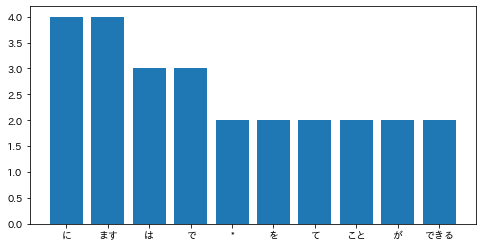

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(keys,values)
plt.show()

11.ヒストグラムで可視化

In [ ]:
values = word_freq.values()

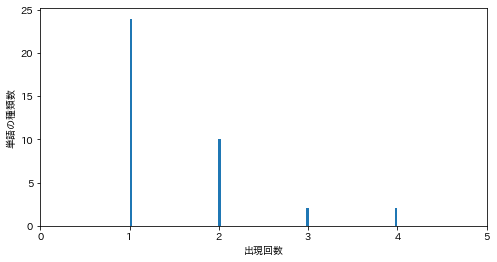

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(values, bins=100)
plt.xlabel('出現回数')
plt.ylabel('単語の種類数')
plt.xlim(0,5)
plt.show()

12.N-gram(文字単位）

In [ ]:
s = '今日は晴れです。'

In [ ]:
i = 0
for i in range(len(s)-1):
    print(s[i:i+2])

今日
日は
は晴
晴れ
れで
です
す。


13.N-gram(単語単位)

In [ ]:
txt = 'Pythonを一緒に学びましょう。'

In [ ]:
tagger = MeCab.Tagger('-Owakati')
tagger.parse(txt)

'Python を 一緒 に 学び ましょ う 。 \n'

In [ ]:
words = tagger.parse(txt).split(' ')[:-1]
words

['Python', 'を', '一緒', 'に', '学び', 'ましょ', 'う', '。']

2単語ずつ表示できるようにする（バイグラム）

In [ ]:
for i in range(len(words)-1):
    print(''.join(words[i:i+2]))

Pythonを
を一緒
一緒に
に学び
学びましょ
ましょう
う。


In [ ]:
'〇'.join(words[1:1+2])

'を〇一緒'

14.N-gramの関数化

In [ ]:
#文字単位
for i in range(len(txt)-2):
    print(txt[i:i+3])

Pyt
yth
tho
hon
onを
nを一
を一緒
一緒に
緒に学
に学び
学びま
びまし
ましょ
しょう
ょう。


In [ ]:
#単語単位
for i in range(len(words)-2):
    print(''.join(words[i:i+3]))

Pythonを一緒
を一緒に
一緒に学び
に学びましょ
学びましょう
ましょう。


In [ ]:
n = 3
for i in range(len(words)-n-1):
    words[i:i+n]

In [ ]:
words = tagger.parse(txt).split(' ')[:-1]
n = 3
[words[i:i+n] for i in range(len(words)-n-1)]

[['Python', 'を', '一緒'],
 ['を', '一緒', 'に'],
 ['一緒', 'に', '学び'],
 ['に', '学び', 'ましょ']]

In [ ]:
def ngram(text,n):
    return [text[i:i+n] for i in range(len(text)-n-1)]

In [ ]:
txt = 'Pythonを一緒に学びましょう。'
words = tagger.parse(txt).split(' ')[:-1]

In [ ]:
ngram(txt,3)

In [ ]:
ngram(words,3)

[['Python', 'を', '一緒'],
 ['を', '一緒', 'に'],
 ['一緒', 'に', '学び'],
 ['に', '学び', 'ましょ']]

15.単語ベクトルの読み込み

In [ ]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2021-08-10 22:19:46--  https://docs.google.com/uc?export=download&confirm=SMnn&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 108.177.97.138, 108.177.97.139, 108.177.97.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-4c-docs.googleusercontent.com/docs/securesc/968v1q9bslq2requ9hpei5v5a08f79sn/h0s5mjpb2v7fbf02j7mebjmq8uj5r28t/1628633925000/06848720943842814915/06243376405720360327Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2021-08-10 22:19:46--  https://doc-10-4c-docs.googleusercontent.com/docs/securesc/968v1q9bslq2requ9hpei5v5a08f79sn/h0s5mjpb2v7fbf02j7mebjmq8uj5r28t/1628633925000/06848720943842814915/06243376405720360327Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-10-4c-docs.googleusercontent.com (doc-10-4c-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-10-4c-d

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)

ValueError: ignored

SyntaxError: ignored